In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
beta_tin = pd.read_excel('betasnV.xlsx')

In [3]:
beta_tin

,Volume (A^3),Volume/Atom,Pressure (Gpa),Volume Uncertainty,Pressure Uncertainty
0,107.881,26.97025,0.2,0.00750,0.1
1,107.461,26.86525,0.4,0.00750,0.1
2,105.618,26.40450,1.4,0.00750,0.1
3,104.589,26.14725,2.1,0.00750,0.1
4,103.096,25.77400,3.0,0.00750,0.1
5,102.366,25.59150,3.5,0.00625,0.1
6,101.528,25.38200,4.1,0.00625,0.1
7,100.816,25.20400,4.6,0.00625,0.1
8,100.139,25.03475,5.1,0.00625,0.1
9,99.113,24.77825,5.9,0.00625,0.1


In [4]:
vals = beta_tin.values.T
volatom = vals[1]
pressure = vals[2]
vol_var = vals[3]**2
pressure_var = vals[4]**2

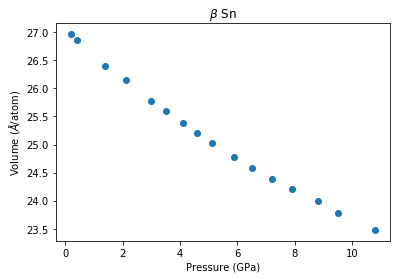

In [5]:
plt.title(r'$\beta$ Sn')
plt.xlabel('Pressure (GPa)')
plt.ylabel(r'Volume ($\AA$/atom)')
plt.scatter(pressure, volatom)

In [6]:
def P(V, K0, K0p, V0):
    return 1.5*K0*((V0/V)**(7/3) - (V0/V)**(5/3))*(1+0.75*(K0p-4)*((V0/V)**(2/3)-1))

In [7]:
opts, cov = curve_fit(P, volatom, pressure, p0=[54.7, 4.5, 27.06])
K0, K0p, Vp = opts
K0_var = cov[0,0]
K0p_var = cov[1,1]
Vp_var = cov[2,2]

In [8]:
opts

array([54.77940738,  4.53538573, 27.06686266])

In [9]:
cov

array([[ 8.29314402e-01, -1.72770966e-01, -1.17894187e-02],
       [-1.72770966e-01,  3.93753839e-02,  2.11731511e-03],
       [-1.17894187e-02,  2.11731511e-03,  2.15775903e-04]])

In [10]:
def f(V, Vp):
    return 0.5 * ((Vp/V)**(2/3)-1)

def F(f,P):
    return P/(3*f*(1+2*f)**(5/2))

def f_var(V,Vp,V_var,Vp_var):
    return Vp**(4/3)*V**(-10/3)/9*V_var + Vp**(-2/3)*V**(-4/3)/9*Vp_var

def F_var(f,P,f_var,P_var):
    return P_var*f**(-2)*(1+2*f)**(-5)/9 + P**2*(4+3*f)**2*f_var*f**(-4)*(1+2*f)**(-7)/144

In [11]:
fbeta = f(volatom, 27.06)
Fbeta = F(fbeta,pressure)

f_unc = f_var(volatom, Vp, vol_var, Vp_var)
F_unc  = np.sqrt(F_var(fbeta, pressure, f_unc, pressure_var))

<ErrorbarContainer object of 3 artists>

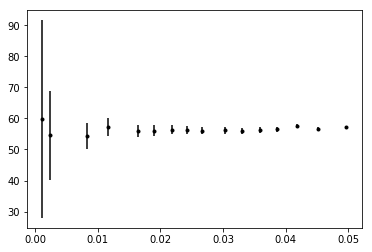

In [12]:
plt.errorbar(fbeta, Fbeta, yerr=F_unc, fmt='k.')

In [13]:
def linearlizedF(f, K, Kp):
    return Kp*f + K

In [14]:
params, Cov = curve_fit(linearlizedF, fbeta, Fbeta, p0=[54.7, 4], sigma=F_unc)

In [15]:
params

array([55.160102  , 38.58122609])

In [16]:
Cov

array([[  0.17369671,  -4.2860838 ],
       [ -4.2860838 , 112.30194103]])